<a href="https://colab.research.google.com/github/VPDeb/VPDeb.github.io/blob/master/US_Debt_to_Population_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



A lovely Blog Post can be found here to see what I gathered from my data analysis.

[VPDebebe Portfolio Blog Post](https://vpdeb.github.io/2020-09-25-2020-09-22-Beginner//)





I began my project with three seperate data sets.

In [2]:
import pandas as pd
USDebt = pd.read_csv('US Debt 2000-2020.csv')
USPopulation = pd.read_csv('US Census 2000-2020.csv')
USInflation = pd.read_csv('US Inflation Rate 2000-2020.csv')


Once my data sets were uploaded I added column headers to them so they had the information needed and the columns I needed to merge later on matched up.  I also created for loops so that I could scale the population and debt columns to be in Billions so when they were plotted they wouldnt be skewed and you could see the comparison.

In [3]:
USDebt.columns=['Year','Debt']

Debt2 = []
for n in USDebt['Debt']:
   debt_per = n / 1000000000
   Debt2.append(debt_per)
USDebt['Debt'] = Debt2


In [4]:
USPopulation.columns=['Population','Year']

Population2 = []
for n in USPopulation['Population']:
   pop_per = n / 1000
   Population2.append(pop_per)
USPopulation['Population'] = Population2

In [5]:
USInflation.columns=['Year','Inflation Rate']


I then merged the three data sets and completed my full dataframe.

In [8]:
US_Data = pd.merge(USDebt, USInflation, on='Year')



In [9]:
US_Data_Comp = pd.merge(US_Data, USPopulation, on='Year')


In [10]:
US_Data_Comp

,Year,Debt,Inflation Rate,Population
0,2020,26793.758276,0.0008,0.32988
1,2019,22719.401753,0.0230,0.32824
2,2018,21516.058183,0.0190,0.32669
3,2017,20244.900016,0.0210,0.32499
4,2016,19573.444714,0.0210,0.32294
5,2015,18150.617666,0.0070,0.32064
6,2014,17824.071381,0.0080,0.31830
7,2013,16739.183527,0.0150,0.31599
8,2012,16066.241407,0.0170,0.31383
9,2011,14790.340329,0.0300,0.31156


In [11]:
from scipy import stats
stats.ttest_ind(US_Data_Comp['Population'], US_Data_Comp['Debt'])

Ttest_indResult(statistic=-9.828563162716963, pvalue=3.1724192701434452e-12)

In [12]:
from scipy.stats import chisquare

print(chisquare(US_Data_Comp.Population, axis=None))
print(chisquare(US_Data_Comp.Debt, axis=None))

Power_divergenceResult(statistic=0.014946829702832481, pvalue=1.0)
Power_divergenceResult(statistic=59465.5934674952, pvalue=0.0)


In [13]:
from scipy.stats import normaltest

print(normaltest(US_Data_Comp.Population))
print(normaltest(US_Data_Comp.Debt))

NormaltestResult(statistic=3.6543200624161223, pvalue=0.16086978481590494)
NormaltestResult(statistic=2.309362234263833, pvalue=0.31515801937461024)


In [14]:
from scipy.stats import kruskal

print(kruskal(US_Data_Comp.Population, US_Data_Comp.Debt))

KruskalResult(statistic=30.767441860465112, pvalue=2.908775141797697e-08)


In [15]:
contingency = pd.crosstab(US_Data_Comp['Population'], US_Data_Comp['Debt'])
contingency

Debt,5674.178210,5807.463412,6228.235966,6783.231063,7379.052696,7932.709662,8506.973899,9007.653372,10024.724897,11909.829004,13561.623031,14790.340329,16066.241407,16739.183527,17824.071381,18150.617666,19573.444714,20244.900016,21516.058183,22719.401753,26793.758276
Population,,,,,,,,,,,,,,,,,,,,,
0.28216,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.28497,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.28763,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.29011,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.29281,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.29552,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.29838,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.30123,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
0.30409,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print("chi2:", chi2)
print("p value:", p_value)
print("dof:", dof)
print("expected_frequencies: \n", expected)

chi2: 420.0
p value: 0.23603032549884584
dof: 400
expected_frequencies: 
 [[0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  0.04761905 0.04761905 0.04761905]
 [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  0.04761905 0.04761905 0.04761905]
 [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  0.04761905 0.04761905 0.04761905]
 [0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  0.04761905 0.04761905 0.04761905 0.04761905 0.04761905 0.04761905
  

Conclusion:

Based on a chi2 statistic of 380.0 and a p-value of .24 we fail to reject the null hypothesis that US Population and US Debt are independent.

In [ ]:
import numpy as np
mean_pop = US_Data_Comp['Population'].mean()
sd_pop= US_Data_Comp['Population'].std()
n_pop = US_Data_Comp['Population'].count()
se_pop = sd_pop/(n_pop**(1/2))

print('se_pop:',se_pop)
print('n_pop:', n_pop)
print('sd_pop:', sd_pop)
print('mean_pop:', mean_pop)


<Figure size 360x360 with 0 Axes>

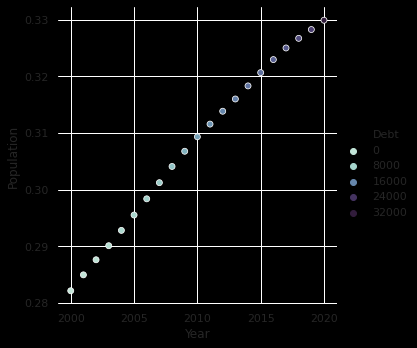

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
g = sns.relplot(
    data=US_Data_Comp,
    x="Year",y="Population",
    hue="Debt",
    palette=cmap, sizes=(100, 200))

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
plt.savefig('US Debt and Population Relationship')
plt.show()

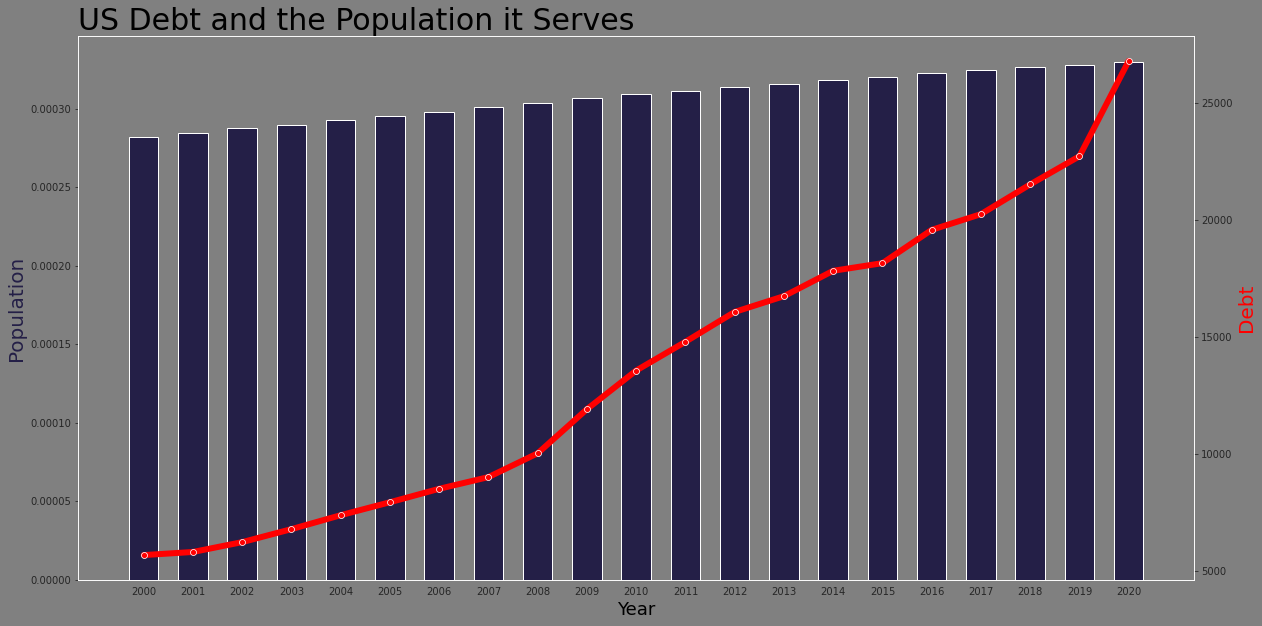

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
#fig = plt.figure(figsize=(20,10))
fig,ax = plt.subplots(figsize=(20,10))
fig.patch.set_facecolor('Gray')
ax.set_facecolor('Gray')
sns.set_style("dark")
ax.set_title('US Debt and the Population it Serves', color='black', fontsize=30, loc='left')
ax.grid(b=False, axis='both')
ax.bar(US_Data_Comp.Year, US_Data_Comp["Population"],width=.6,color="#241f47",align='center')

ax2=ax.twinx()
ax2 = sns.lineplot(US_Data_Comp.Year, US_Data_Comp.Debt, color="red", marker='o', linewidth=6)



ax.set_xlabel("Year",color='black',fontsize=18)
ax.set_xticks([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,
              2013,2014,2015,2016,2017,2018,2019,2020])

ax.set_ylabel("Population",color="#241f47",fontsize=20)




ax2.set_ylabel("Debt",color='red',fontsize=20)

#plt.savefig('US Debt and Population')
plt.show()
